# Analisi esplorativa univariata

Scaletta degli argomenti:
- Analisi di una singola variabile categorica:
    - Frequenza empirica assoluta
    - Frequenza empirica relativa
    - Istogrammi
- Analisi di una singola variabile numerica:
    - Istogrammi e discretizzazione
    - Indici di tendenza centrale:
        - Media, Mediana, Moda
    - Indici di dispersione:
        - Range, Varianza, Deviazione Standard
    - Z-score e rilevamento outlier
    - Quartili
    - Diagrammi a baffi, aka box-and-whisker plots / boxplots


In [1]:
import numpy as np
import plotly.offline as py
import plotly.graph_objs as go

py.init_notebook_mode(connected=True)

Nomenclatura: immaginiamo il dataset come una tabella.
- Le colonne sono le **variabili** o **attributi**.
- Le righe sono dette **osservazioni**, o, secondo la nomenclatura tipica del machine learning, **istanze**.

In questa lezione trattiamo l'analisi esplorativa **univariata**. Ovvero, consideriamo una sola variabile del nostro dataset per volta.  Nella prossima lezione parleremo dell'analisi **bivariata**, che studia relazioni tra coppie di variabili.

Consideriamo un dataset con $m$ osservazioni.
Chiamiamo $\boldsymbol{a}$ la variabile che vogliamo analizzare.  I singoli valori della variabile saranno $x_1, x_2, \ldots, x_m$.
$\boldsymbol{a}=(x_1, x_2, \ldots , x_m)$

Nota: nella notazione matematica useremo, come di abitudine, indici che partono da 1. Nel codice, utilizzeremo indici che partono da 0.

L'analisi differisce tra variabili **categoriche** e variabili **numeriche**.

## 1. Analisi univariata con variabili *categoriche*
Si assume che la variabile $\boldsymbol{a}$ possa assumere $H$ valori distinti $v_1, \ldots, v_H$.

$\boldsymbol{v}=(v_1, \ldots, v_H)$ viene detto supporto.

### Distribuzione empirica (frequenza empirica assoluta)

$$e_h = \#\{x_i=v_h , i=1,\ldots, m\}$ per $h=1, \ldots, H$$

Ovvero: per quante delle $m$ osservazioni la variabile prende il valore $v_h$?

### Frequenza empirica relativa

$$f_h = \frac{e_h}{m}$$

Ovvero: per quale frazione delle $m$ osservazioni la variabile prende il valore $v_h$?

### Esempio
$$\boldsymbol{a} = (\text{gatto}, \text{gatto}, \text{cane}, \text{topo})$$

- $ m = ? $
- $ H = ? $
- $ \boldsymbol{v} = ? $
- $ e_h = ? $
- $ f_h = ? $

In [2]:
a = ["gatto", "gatto", "cane", "topo", "gatto"]
m = len(a)
v = list(set(a))
H = len(v)


print("Supporto della variabile:")
for i in range(len(v)):
    print(f"v[{i}] = {v[i]}")
    
print("Frequenza empirica assoluta:")
e = []
for i in range(len(v)):
    e.append(np.sum(np.array(a) == v[i]))
    print(f"e[{i}] = {e[i]}")
    
print("Frequenza empirica relativa:")
f = []
for i in range(len(v)):
    f.append(e[i] / len(a))
    print(f"f[{i}] = {f[i]}")

Supporto della variabile:
v[0] = cane
v[1] = topo
v[2] = gatto
Frequenza empirica assoluta:
e[0] = 1
e[1] = 1
e[2] = 3
Frequenza empirica relativa:
f[0] = 0.2
f[1] = 0.2
f[2] = 0.6


## 2. Rappresentazioni a barre per variabili categoriche o continue
Posso rappresentare questi dati tramite un *bar plot* (*grafico a barre*).  il termine piu' usato e' **istogramma**.

In [3]:
data = [go.Histogram(x=a)] # Variante: prova a usare "y=a" come parametro
py.iplot(data)

### Istogrammi per variabili numeriche: la discretizzazione
Per variabili numeriche discrete che assumono un numero finito e limitato di valori (ad esempio: l'attributo *numero di cilindri* in un database di auto) è possibile ricorrere ad una rappresentazione mediante diagrammi a barre come per gli attributi categorici.

Per variabili numeriche continue (ad esempio dei `float`) che assumono un numero in pratica infinito di valori questa non e' una buona idea.

In questo caso, prima devo **discretizzare** la mia variabile (binning) in $R$ intervalli.

Come si effettua la discretizzazione?  Abbiamo diverse opzioni.

1. si definiscono a mano degli intervalli (bin) ragionevoli
2. si considera il range totale dei valori assunti dalla variabile $\boldsymbol{a}$, e lo si divide in un numero di intervalli di uguale larghezza.

Ogni intervallo è chiuso a sinistra ed aperto a destra. In questo modo si evita che vi siano valori che appartengono contemporaneamente a classi contigue. 

Una volta determinata la suddivisione in R classi, si possono calcolare 
- le frequenze empiriche assolute contando il numero di osservazioni $e_r, r=1, \ldots, R$, che cadono in ciascun intervallo.
- le frequenze empiriche relative ottenute come $$f_r = \frac{e_r}{m}$$

In [4]:
a = np.array([5.0, 2.5, 1.1, 12.4, 15.5, 0.3])
R = 2
bins = np.linspace(min(a), max(a), R+1)
bins[-1] = np.inf
e = []
print("Frequenza empirica assoluta:")
for i in range(R):
    mask = (bins[i] <= a) & (a < bins[i+1])
    print(mask)
    e.append(sum(mask))
    print(f"e[{i}] = {e[i]} (values between {bins[i]} (incl) and {bins[i+1]} (excl))")

Frequenza empirica assoluta:
[ True  True  True False False  True]
e[0] = 4 (values between 0.3 (incl) and 7.8999999999999995 (excl))
[False False False  True  True False]
e[1] = 2 (values between 7.8999999999999995 (incl) and inf (excl))


In [5]:
data = [go.Histogram(x=a)] # Variante: prova a usare "y=a" come parametro
py.iplot(data)

Nota la differenza di rappresentazione: i grafici a barre relativi a variabili categoriche hanno spesso le barre separate l'una dall'altra.  I grafici a barre relativi a variabili continue visualizzano le barre collegate.

In [6]:
data = [go.Histogram(x=a,
            xbins={"start":0,
                   "end":20,
                   "size":1})]
py.iplot(data)

### Esempio
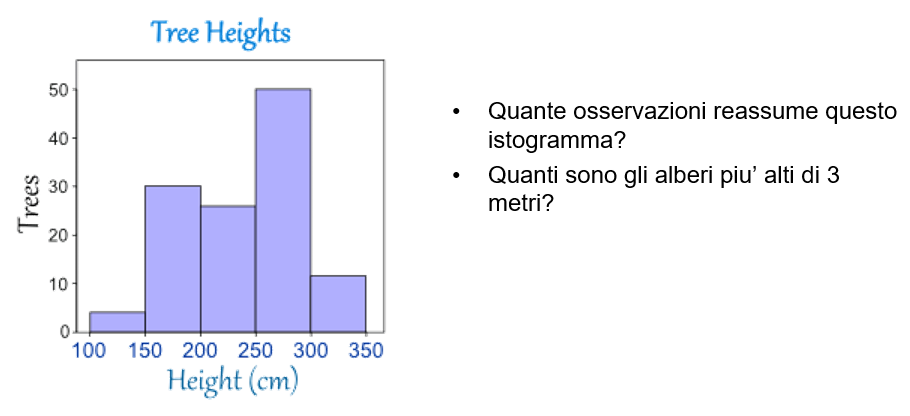

https://www.mathsisfun.com/data/histograms.html

### Un bellissimo istogramma, da capire!
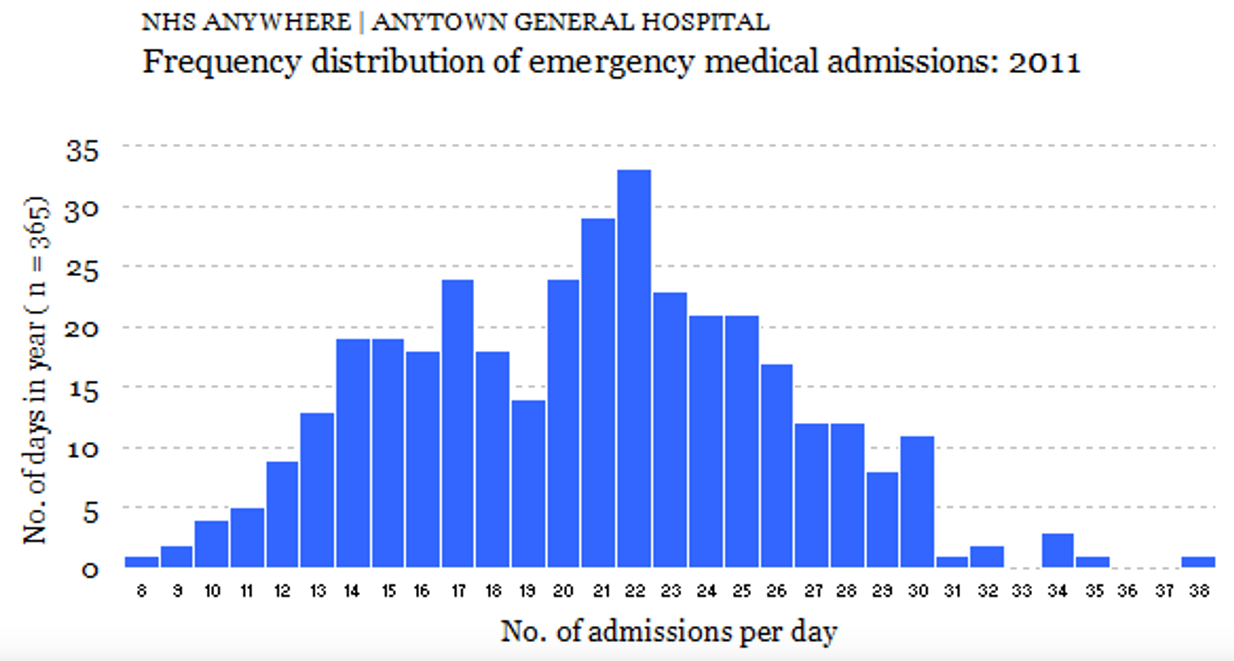

http://www.kurtosis.co.uk/visualizing/index.htm

### Esercizio: genera un grafico come quello sopra



### Esempio: un istogramma fisico
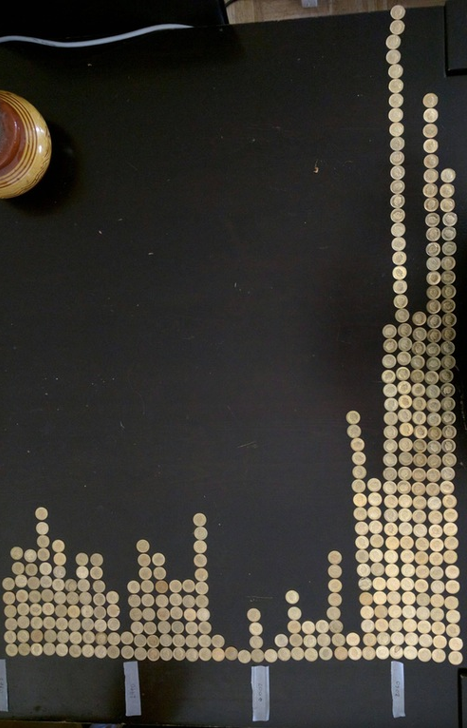
https://www.reddit.com/r/dataisbeautiful/comments/4fnc2l/my_own_coin_histogram_of_swisschf_5_cents_oc/

### Esempio
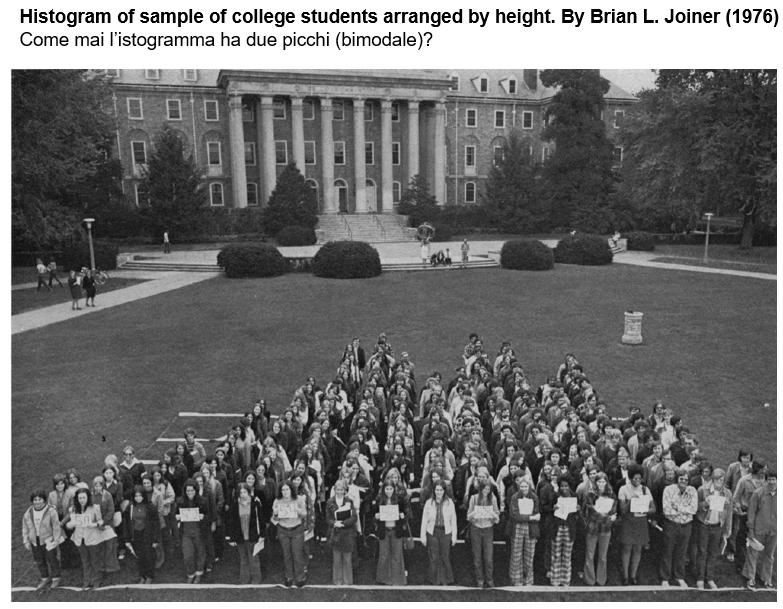

### Altri esempi di istogrammi interessanti
- http://www.ravi.io/language-word-lengths
- http://www.joeycloud.net/v/pianogram/

## 3. Analisi univariata per variabili *numeriche*
- Indici di **tendenza centrale**
    - Media
    - Mediana
    - Moda
- Indici di **dispersione**
    - Varianza campionaria
    - Deviazione standard campionaria

### Indici di tendenza centrale

#### Media
$$\bar{x} = \frac{1}{m}\sum_{i=1}^{m}x_i$$

In [7]:
a = np.array([1.0, 8.0, 3.0])
print(f"media = {np.sum(a) / len(a)}")
print(f"media = {np.mean(a)}")

media = 4.0
media = 4.0


#### Mediana
La mediana e' un numero che separa i valori in due meta'; una meta' piu' grande della mediana; una meta' piu' piccola della mediana.
Si calcola in modo diverso a seconda del fatto che $m$ sia pari oppure dispari.
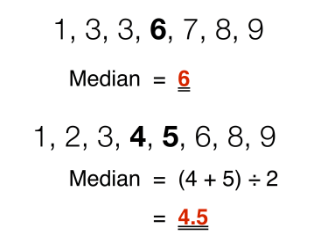


https://en.wikipedia.org/wiki/Median

In [8]:
a = np.array([5, 6, 7, 1, 2, 3])

asort = np.sort(a)
if(len(a)%2 == 1):
    median = asort[(len(asort)-1)//2]
else:
    median = (asort[len(asort)//2] + asort[len(asort)//2-1])/2
    median = np.mean(asort[[len(asort)//2-1, len(asort)//2]])
print(median, np.median(a))

4.0 4.0


#### Moda
Il valore piu' frequente.  Nota che, al contrario di media e mediana, la moda di una variabile categorica e' un valore ben definito.

Quando si fanno le elezioni con sistema maggioritario, il partito che vince e' la *moda* dei voti effettuati.

#### Rappresentazione grafica
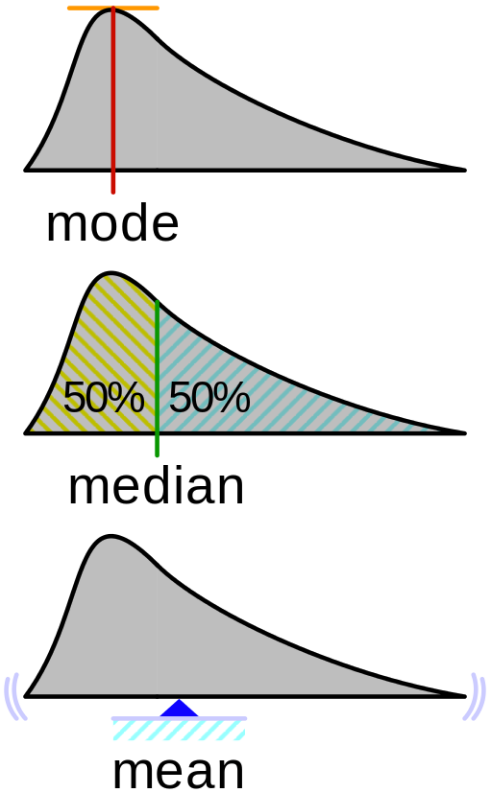

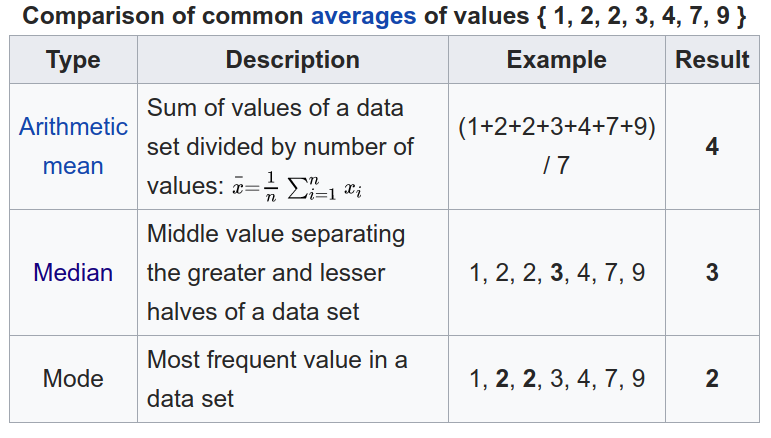

#### L'importanza delle mediana
La moda si usa raramente.  La mediana invece si usa molto spesso. In che modo differiscono?

Considera questo bravo studente SUPSI, che pero' al momento e' un po' distratto.  Mettiamo che gli venga data la possibilita' di scegliere se basare il suo voto di diploma sulla media dei voti, oppure sulla mediana.  Cosa gli conviene scegliere?

In [9]:
myVotes = [5.8, # Grafica
           5.7, # Sistemi operativi
           5.9, # Ingegneria del Software
           5.7, # Applicazioni Web
           4.0] # Data Science

# print(np.mean(myVotes), np.median(myVotes))

#### Esercizio
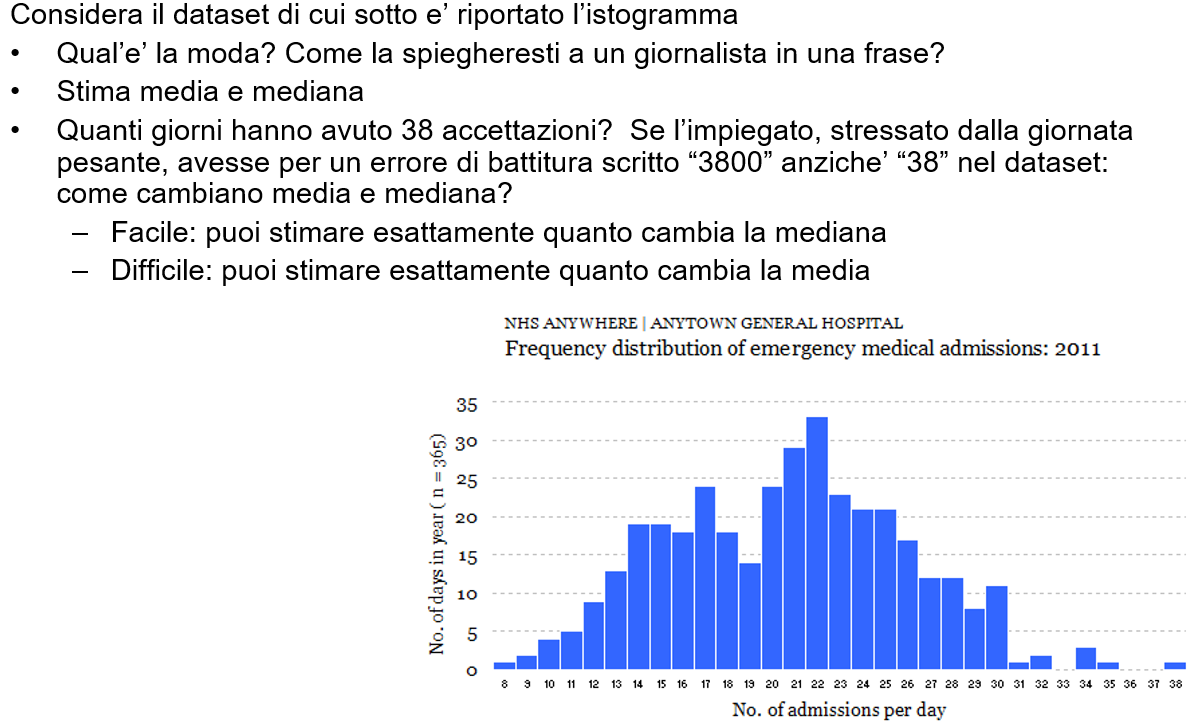

### Indici di dispersione
Oltre agli indici di tendenza centrale è rilevante definire altri indici che ci informino circa il livello di dispersione dei dati, ovvero il grado di variabilità che le osservazioni manifestano rispetto ai valori centrali.

In [10]:
a = np.random.randn(1000)
b = np.random.randn(1000) * 3

def compare_histograms(a, b):
    bins = {"start":-200, "end":+200, "size":0.5}
    data = [go.Histogram(x=a, xbins=bins, opacity=0.4),
            go.Histogram(x=b, xbins=bins, opacity=0.4)]
    layout = go.Layout(barmode='overlay')
    fig = go.Figure(data, layout)
    py.iplot(fig)
    
compare_histograms(a, b)

In [11]:
print(np.mean(a), np.mean(b))

-0.0007709229643714561 0.04038603152546218


#### Range
Il range di una variabile equivale all'intervallo tra minimo e massimo valore.

In [12]:
print(f"Range di a: ({np.min(a)}, {np.max(a)})")
print(f"Range di b: ({np.min(b)}, {np.max(b)})")

Range di a: (-3.3396231051609444, 3.635974703379279)
Range di b: (-12.657177660402688, 9.46813854899821)


il range tiene in considerazione solo i valori estremi, e ignora il resto

In [13]:
a2 = np.append(a, [-50, +50])
b2 = np.append(b, [-50, +50])
print(f"Range di a2: ({np.min(a2)}, {np.max(a2)})")
print(f"Range di b2: ({np.min(b2)}, {np.max(b2)})")

Range di a2: (-50.0, 50.0)
Range di b2: (-50.0, 50.0)


In [14]:
compare_histograms(a2,b2)

#### Scarto
La **deviazione** (o **scarto**) di un valore è definita come la differenza (con segno!) dalla media aritmetica campionaria.  Nota che lo scarto si calcola **per ogni signolo valore!**.
$$s_i = x_i - \bar{x}$$

In [15]:
c = np.array([1, 2, 5])
s = c - np.mean(c)
print(c)
print(s)

[1 2 5]
[-1.66666667 -0.66666667  2.33333333]


#### Varianza
E se per esprimere la dispersione della variabile facessimo la media degli scarti?

In [16]:
print("Media degli scarti di c:", np.mean(c - np.mean(c)))
print("Media degli scarti di a:", np.mean(a - np.mean(a)))
print("Media degli scarti di b:", np.mean(b - np.mean(b)))

Media degli scarti di c: 1.4802973661668753e-16
Media degli scarti di a: 1.7763568394002505e-17
Media degli scarti di b: 7.105427357601002e-18


Uh-oh... Forse non e' quello che ci aspettavamo.  La media degli scarti e' zero.  Perche'?

Un'idea alternativa: facciamo la media degli scarti **al quadrato**. In questo modo, evitiamo che gli scarti positivi e quelli negativi si annullino a vicenda.

In [17]:
print(c)
print(c - np.mean(c))
print((c - np.mean(c))**2) # nota che questi valori sono tutti positivi...
print(np.mean((c - np.mean(c))**2)) # nota che questi valori sono tutti positivi...

[1 2 5]
[-1.66666667 -0.66666667  2.33333333]
[2.77777778 0.44444444 5.44444444]
2.8888888888888893


Abbiamo inventato la varianza!
$$\sigma^2 = \frac{1}{m}\sum_{i=1}^m s_i^2 = \frac{1}{m}\sum_{i=1}^m (x_i - \bar{x})^2$$

In [18]:
print(np.var(c))

2.8888888888888893


#### Deviazione standard
La **deviazione standard** non e' altro che la varianza sotto radice quadrata. $$\sigma = \sqrt{\sigma ^ 2}$$

In numpy: `np.std(a)`

La deviazione standard e' piu' comoda della varianza perche' si esprime con la stessa unita' di misura della variabile di cui la calcolo.

Se la variabile si assume distribuita in modo gaussiano, vale la relazione visualizzata sotto, nota come [68–95–99.7 rule](https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule).
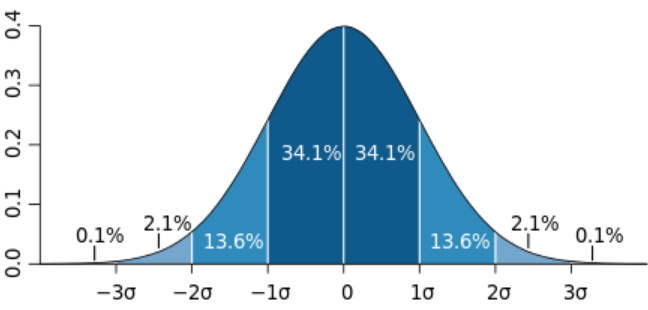

Verifichiamo se la regola vale sui dati che abbiamo generato (che venivano da una distribuzione gaussiana)

In [19]:
mean = np.mean(a)
std = np.std(a)
fraction = np.sum(((mean - std) < a) & (a < (mean + std))) / len(a)
print(fraction)

0.675


Intuizione
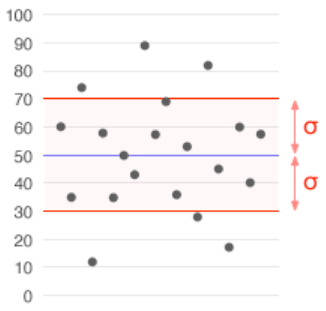

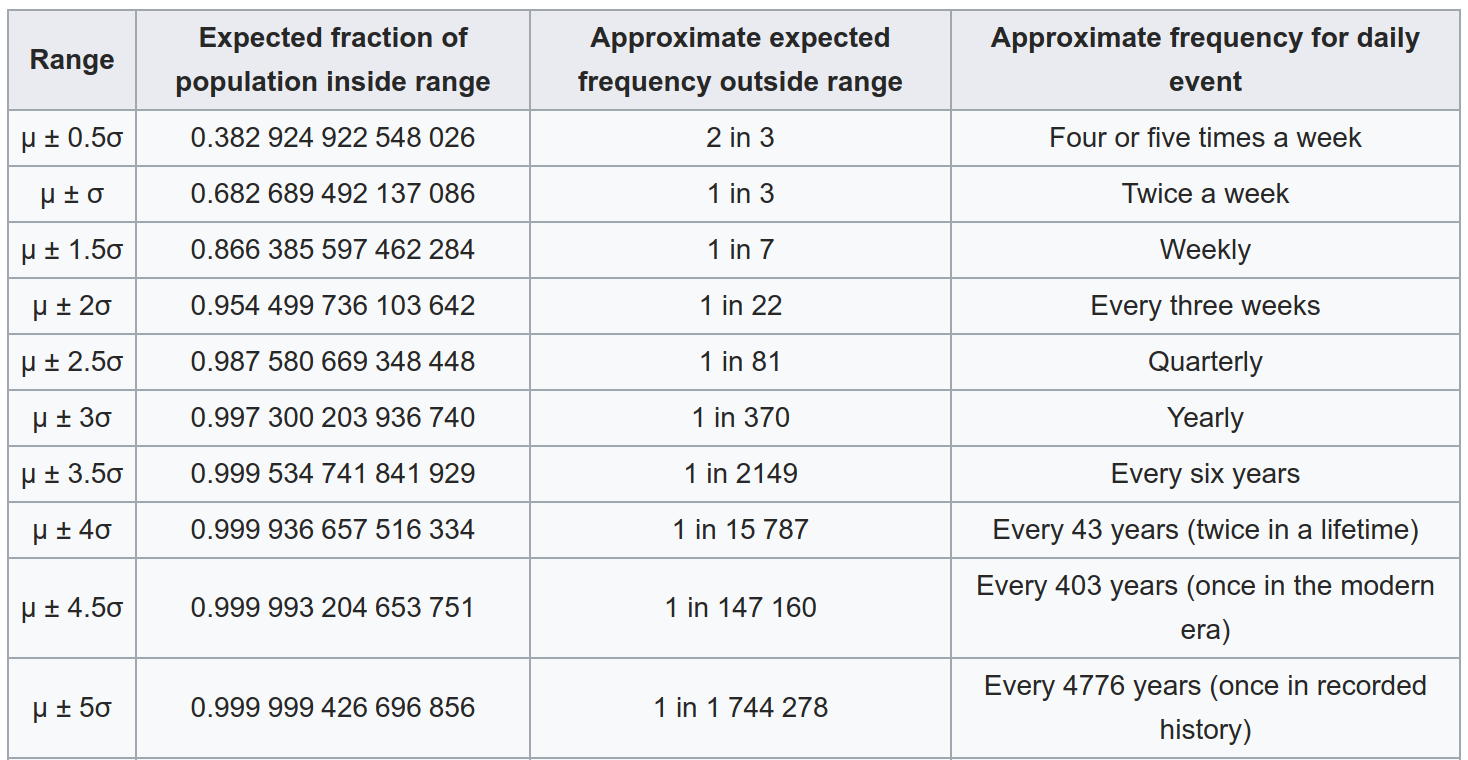

Un utile esempio da [wikipedia](https://en.wikipedia.org/wiki/Standard_deviation#Standard_deviation_of_average_height_for_adult_men):
> If the population of interest is approximately normally distributed, the standard deviation provides information on the proportion of observations above or below certain values. For example, the average height for adult men in the United States is about 70 inches (177.8 cm), with a standard deviation of around 3 inches (7.62 cm). This means that most men (about 68%, assuming a normal distribution) have a height within 3 inches (7.62 cm) of the mean (67–73 inches (170.18–185.42 cm)) – one standard deviation – and almost all men (about 95%) have a height within 6 inches (15.24 cm) of the mean (64–76 inches (162.56–193.04 cm)) – two standard deviations. If the standard deviation were zero, then all men would be exactly 70 inches (177.8 cm) tall. If the standard deviation were 20 inches (50.8 cm), then men would have much more variable heights, with a typical range of about 50–90 inches (127–228.6 cm). Three standard deviations account for 99.7% of the sample population being studied, assuming the distribution is normal (bell-shaped). (See the 68-95-99.7 rule, or the empirical rule, for more information.)

### Z-score e rilevamento outlier
Si definisce intuitivamente come outlier un’osservazione che abbia caratteristica anomala rispetto all’insieme delle restanti osservazioni per l’attributo considerato.

Lo **z-score** è una quantita' che possiamo definire per ogni singola osservazione, come:
$$z_i = \frac{x_i - \bar{x}}{\sigma}$$.

Vengono considerati come sospetti outlier le osservazioni che mostrano un valore dello z-score maggiore di 3 *in valore assoluto* e come fortemente sospetti outlier quelle osservazioni per le quali tale valore è molto maggiore di 3, sempre in valore assoluto.

In [20]:
print(c)
print(c - np.mean(c))
print((c - np.mean(c)) / np.std(c))

[1 2 5]
[-1.66666667 -0.66666667  2.33333333]
[-0.98058068 -0.39223227  1.37281295]


### Esercizio
Quanti valori con z-score superiore a 3 (in valore assoluto) ci sono in `a`? Quanti in `b`?

E in `a2`?

Nella tua lista di voti ottenuti finora durante il bachelor, ci sono degli outlier?

### Quantili
Un quantile di ordine $p$ è il valore $q_p$ tale che un numero pari almeno a $p \cdot m$ osservazioni cade alla sinistra di $q_p$ e le rimanenti $(1-p) \cdot m$ cadono alla sua destra.

In [21]:
c = np.array([10, 11, 12, 13, 14])
np.quantile(c,0.2)

10.8

Curiosità: ci sono 8 modi diversi per calcolare in pratica i quantili; sono descritti a questo link: `https://www.resacorp.com/method_N.htm` con `N` che va da 1 a 8.

### Quartili (attento: quaNtile $\neq$ quaRtile)!

Il quantile per $p=0.5$ equivale alla mediana.

Il quantile per $p=0.25$ viene denominato quartile inferiore ($q_L$) mentre il quantile per $p=0.75$ è noto come quartile superiore ($q_U$).

In alcuni casi può essere utile conoscere il valore della distanza interquartile, definita come $$D_q = q_U - q_L = q_{0.75} - q_{0.25}$$

### Boxplot (aka box-and-whiskers plot)
Nella rappresentazione box-and-whisker, gli outlier si identificano come i valori che cadono al di fuori dell’intervallo $$[q_L - 1.5 D_q, q_U + 1.5 D_q]$$
Nota che questa convenzione non coincide con il criterio dato dallo z-score!
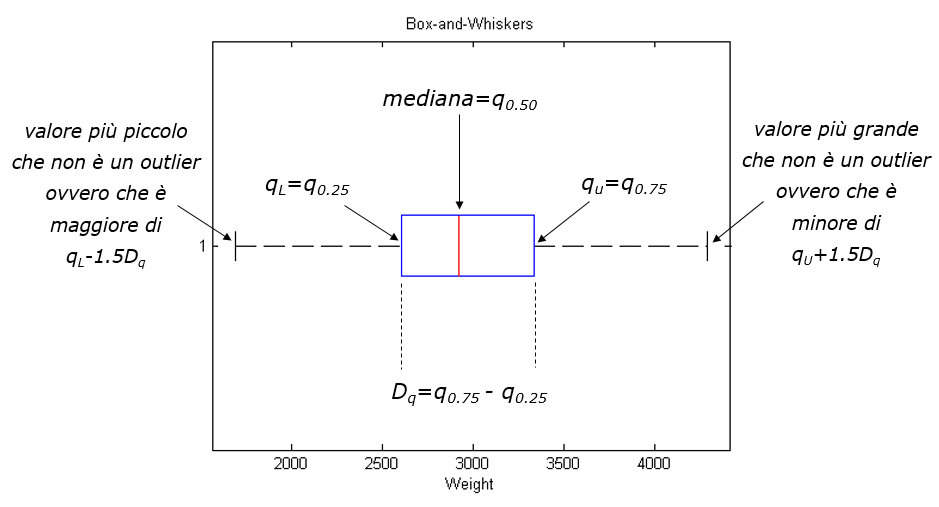

Nota: questa convenzione per disegnare i baffi si chiama convenzione di Tukey.
Esistono anche altre convenzioni (v. http://boxplot.tyerslab.com/ )

Un'osservazione viene definita come outlier se cade all'esterno dei due baffi
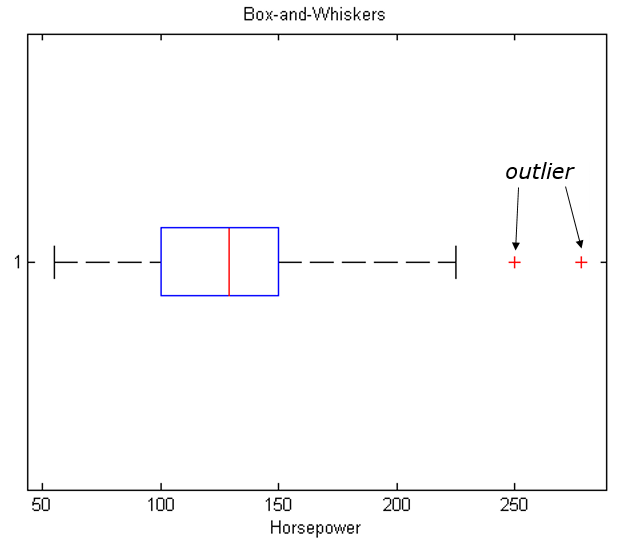

Un boxplot mi da' l'idea della distribuzione che rappresenta
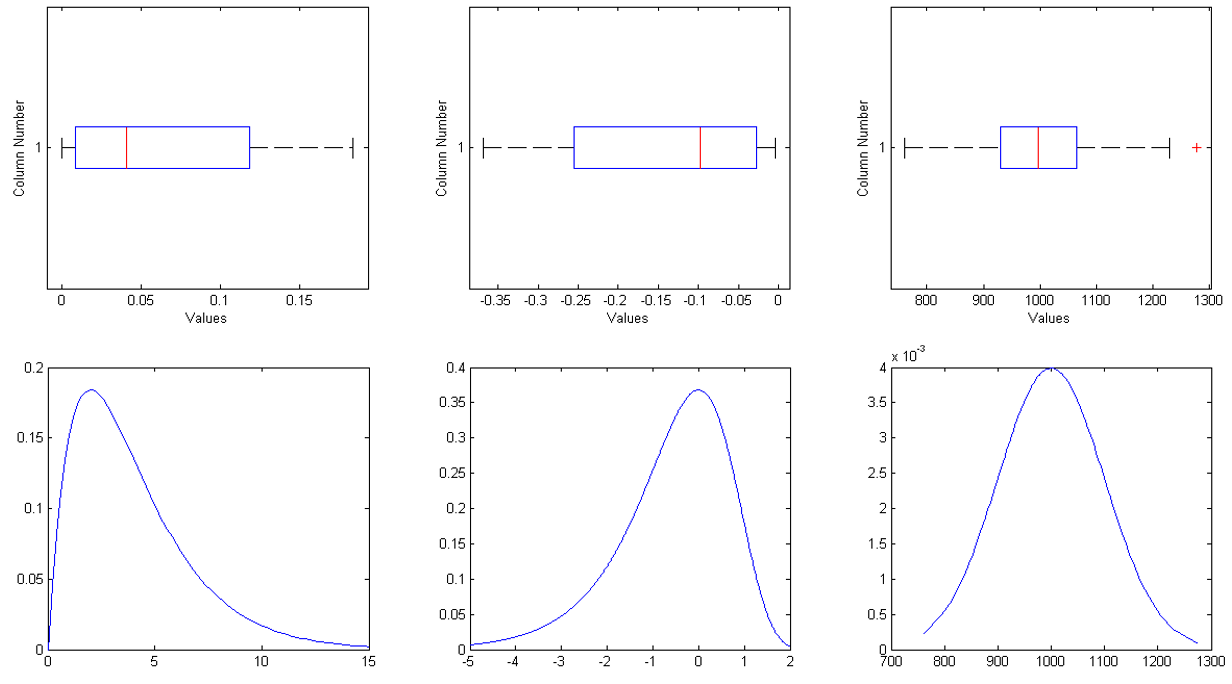

### Un esempio reale: numero di nascite in Quebec ogni giorno dal 1977 al 1991
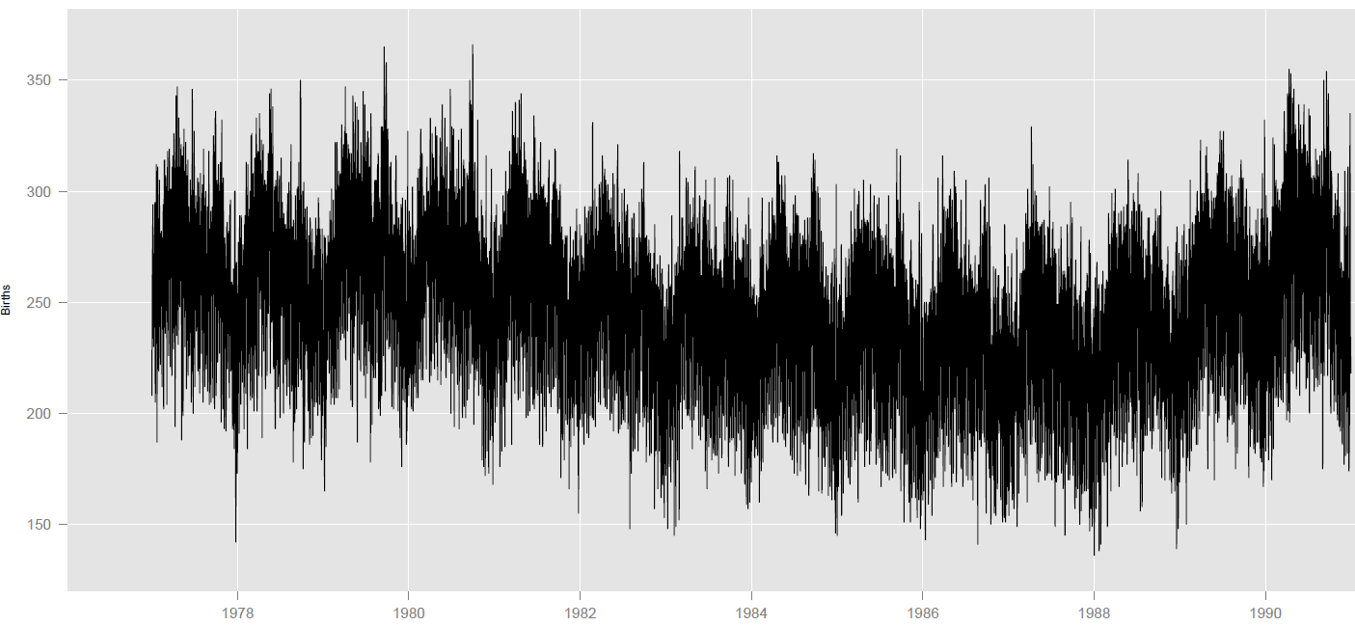
Tratto da: http://www.dashboardinsight.com/articles/digital-dashboards/building-dashboards/box-and-strip-plots-with-r.aspx

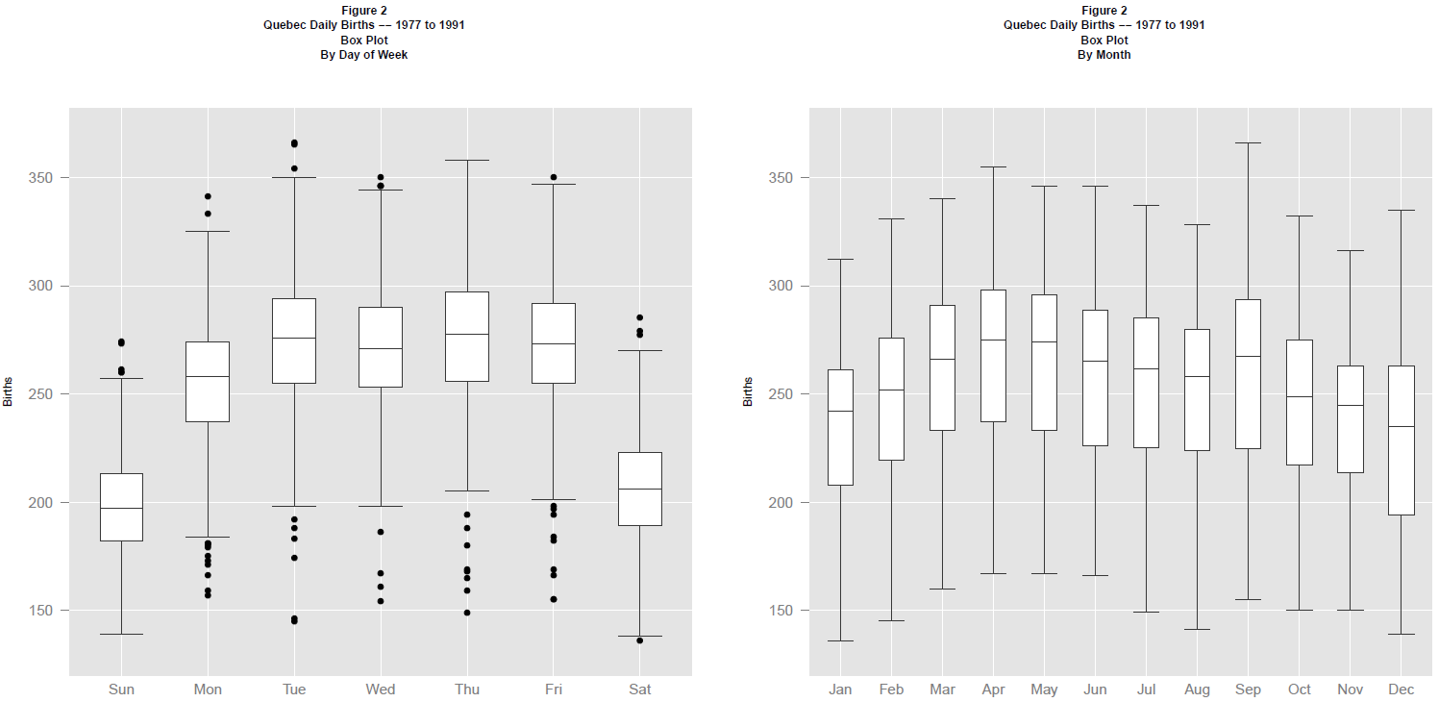

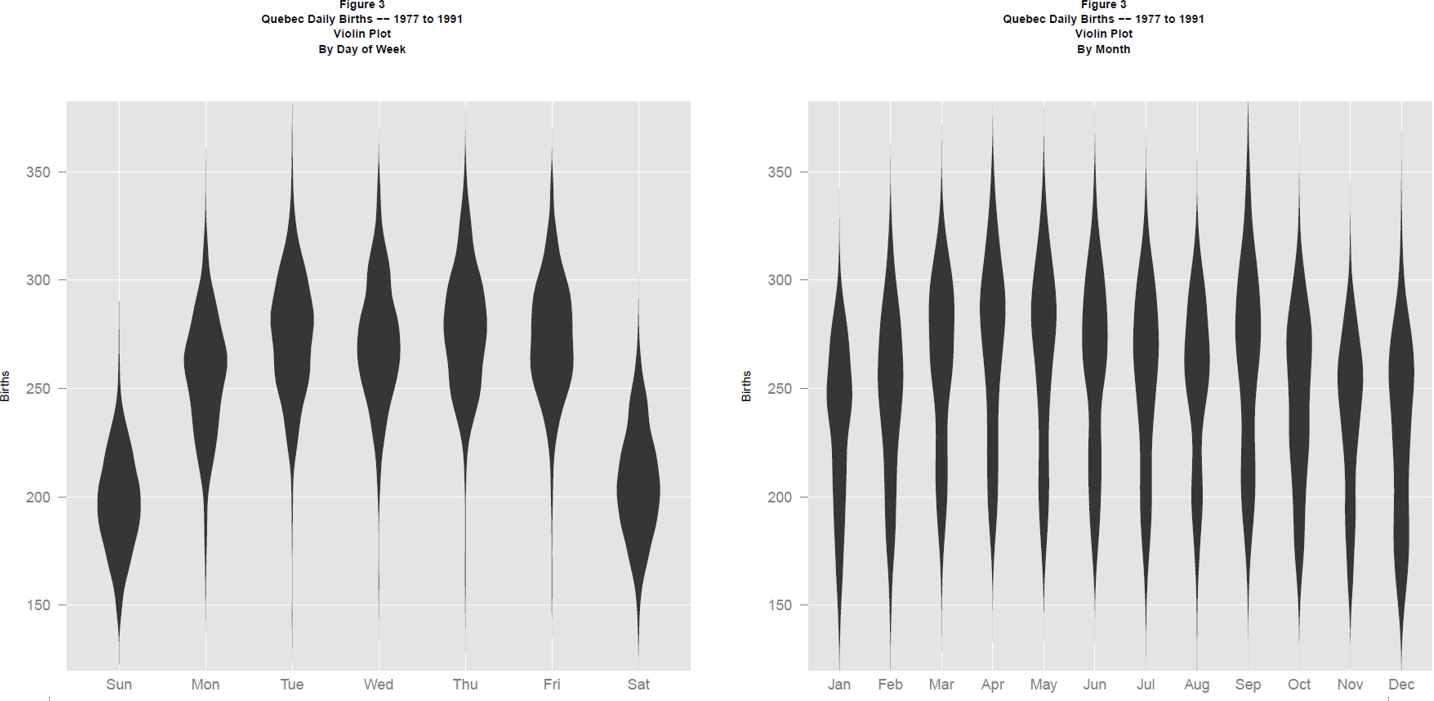

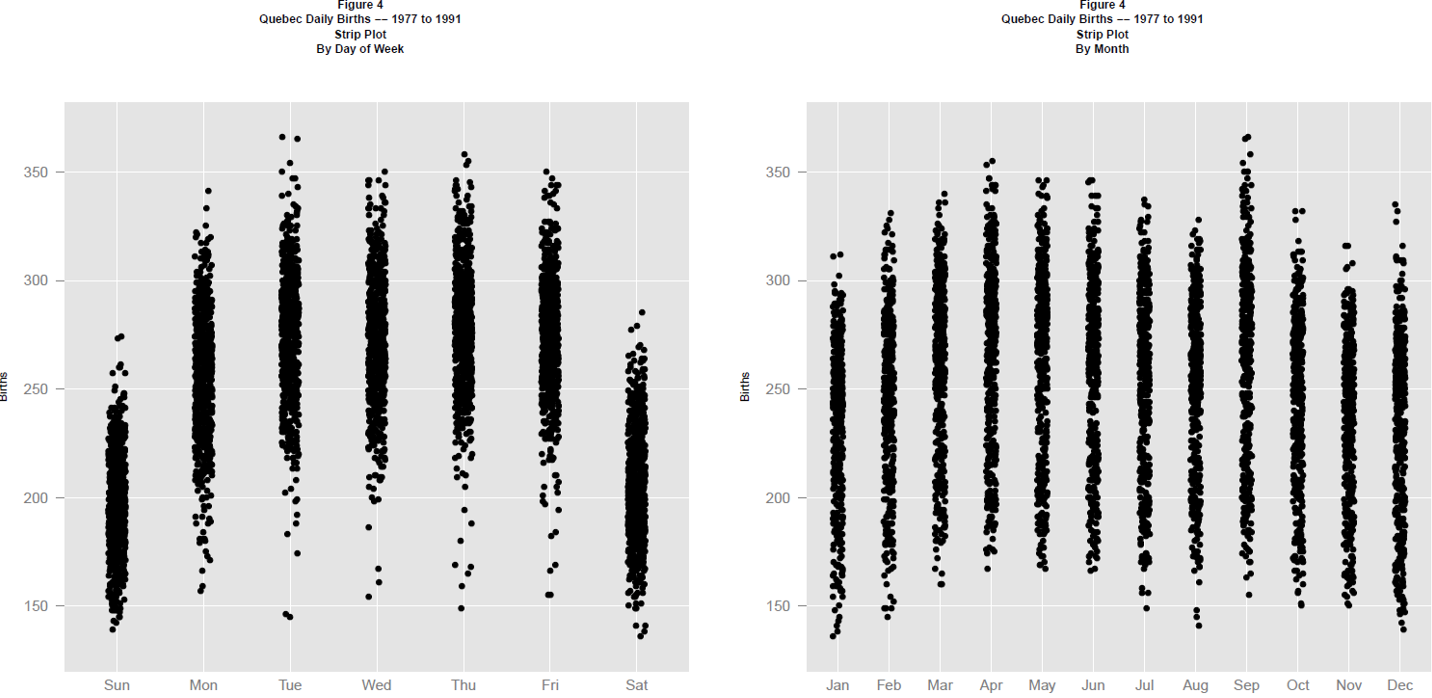

# Esercizio riassuntivo
Utilizziamo il file `stralugano.csv` disponibile su iCorsi. Riguarda i risultati della stralugano 2018, 10Km maschile.

In [22]:
import pandas as pd
df=pd.read_csv("stralugano.csv",keep_default_na=False)

In [23]:
df

,posto,nome,anno,provenienza,squadra,ore,minuti,secondi,decimi
0,1,Engelhardt Adriano,1992,Locarno,,0,31,49,1
1,2,Repetto Emanuele,1990,I-Camogli (GE),Delta Spedizioni,0,32,16,8
2,3,Huber Erich,1981,Rechthalten,LAT Sense,0,33,25,5
3,4,Buffa Nicola,1984,I-Vicenza (VI),VICENZA MARATHON,0,33,31,8
4,5,Maffongelli Marco,1988,S. Pietro,,0,34,29,4
5,6,Boggini Ivan,1980,Oberengstringen,UBS TEAM,0,35,9,1
6,7,Nogara Stefano,1979,I-Grandola Ed Uniti (CO),G.S.A. COMETA ASD,0,35,40,0
7,8,Pezzani Luca,1987,Rivera,AS Monteceneri,0,35,42,7
8,9,Lanzone Fabio,1998,I-Rivara (TO),ATLETICA SETTIMESE,0,35,48,1
9,10,Losa Alessandro,1974,I-Luino (VA),TEAM GABBANI,0,36,4,8


In [24]:
# Otteniamo dei numpy array per gli attributi che ci interessano
ore = df["ore"].values
minuti = df["minuti"].values
secondi = df["secondi"].values
decimi = df["decimi"].values
anno = pd.to_numeric(df["anno"], errors="coerce").values
eta = 2018-anno

### 1
Calcola il tempo di ciascun corridore, in minuti.

Calcola media, deviazione standard. Disegna l'istogramma.

In [26]:
tempo = ore*60 + minuti + secondi/60 + decimi/600
np.mean(tempo)
np.std(tempo)

8.835605188258219

### 2
Calcola manualmente i valori importanti per il boxplot secondo la convenzione di Tukey, in particolare:
- estremi del box
- tratto centrale del box (mediana)
- estremi dei baffi
- eventuali outlier da disegnare

### 3
Disegna il boxplot con plotly, e controlla di aver fatto bene i conti qui sopra